In [1]:
import cv2

image_path = 'New folder/download.jpeg'
image = cv2.imread(image_path)

In [2]:
import matplotlib.pyplot as plt

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plt.figure(figsize=(10, 6))
# plt.imshow(gray_image)
# plt.axis('off')
# plt.show()

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.5, minNeighbors=3, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
# faces

In [4]:
for (x, y, w, h) in faces:
    face_region = image[y:y+h, x:x+w]
    blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)
    image[y:y+h, x:x+w] = blurred_face

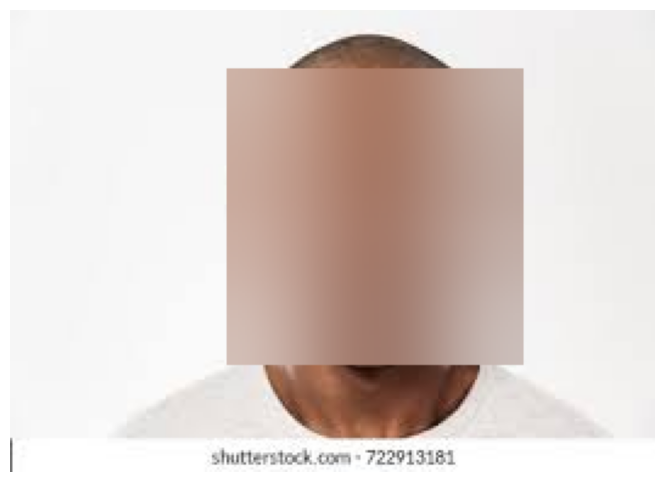

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


All Images

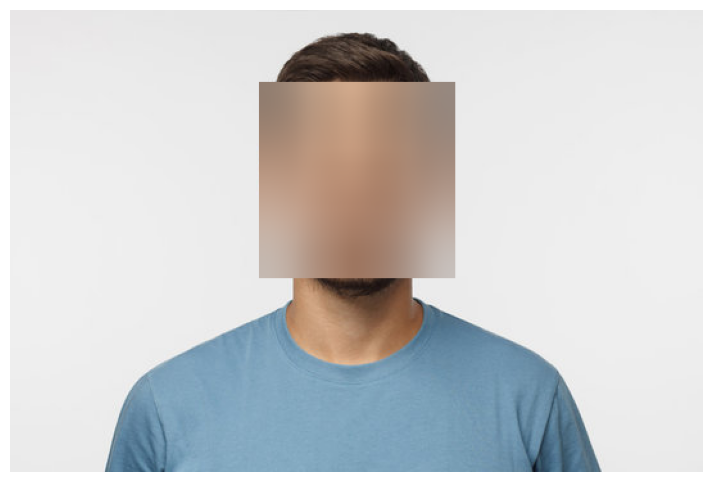

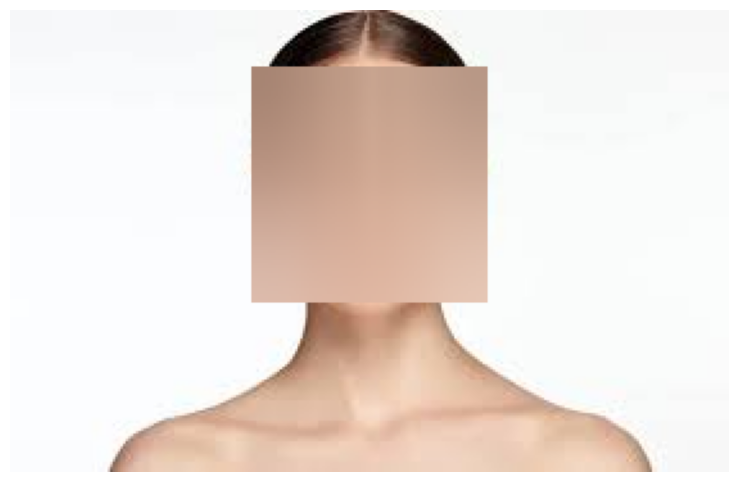

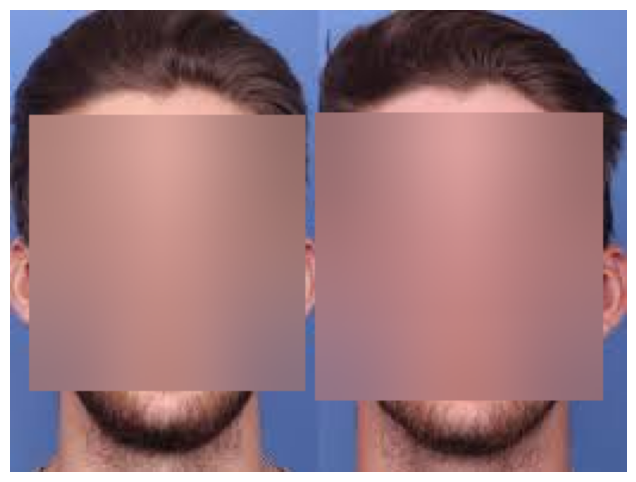

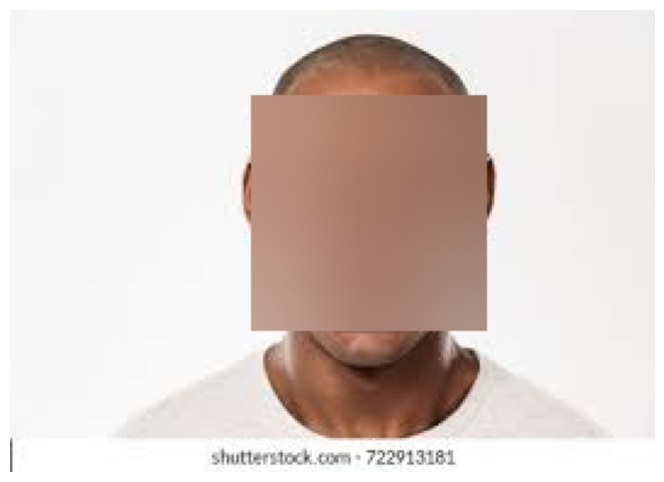

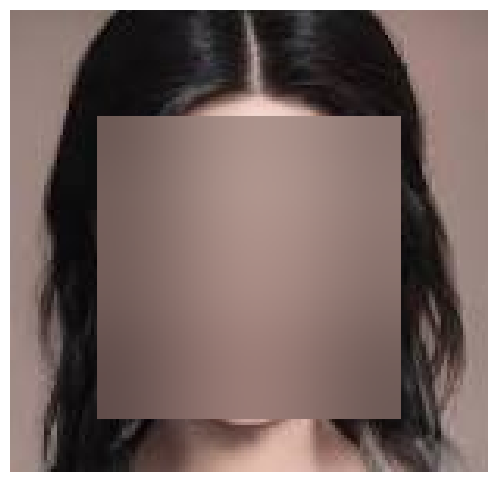

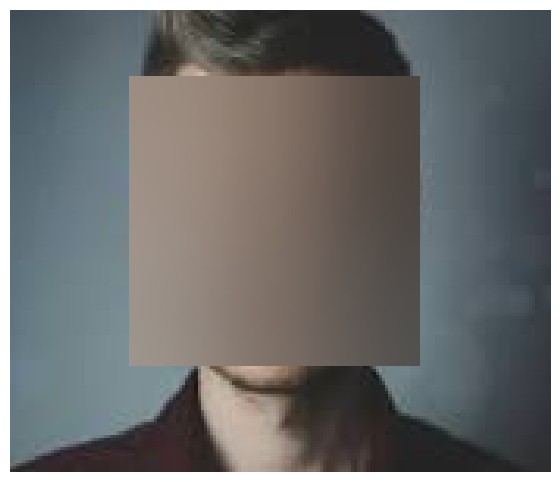

In [6]:
import os

def faces_blur(folder_path):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Error in {image_path}")
            continue
        
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)

        for (x, y, w, h) in faces:
            face_region = image[y:y+h, x:x+w]
            blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)
            image[y:y+h, x:x+w] = blurred_face

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 6))
        plt.imshow(image_rgb)
        # plt.title(image_file)
        plt.axis('off')
        plt.show()

folder_path = 'New folder/'
faces_blur(folder_path)
